In [325]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('train.csv')


In [327]:
df.head(10)

id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
0   0    1    1017.4     21.2         20.6     19.9      19.4      87.0   
1   1    2    1019.5     16.2         16.9     15.8      15.4      95.0   
2   2    3    1024.1     19.4         16.1     14.6       9.3      75.0   
3   3    4    1013.4     18.1         17.8     16.9      16.8      95.0   
4   4    5    1021.8     21.3         18.4     15.2       9.6      52.0   
5   5    6    1022.7     20.6         18.6     16.5      12.5      79.0   
6   6    7    1022.8     19.5         18.4     15.3      11.3      56.0   
7   7    8    1019.7     15.8         13.6     12.7      11.8      96.0   
8   8    9    1017.4     17.6         16.5     15.6      12.5      86.0   
9   9   10    1025.4     16.5         14.4     12.0       8.6      77.0   

   cloud  sunshine  winddirection  windspeed  rainfall  
0   88.0       1.1           60.0       17.2         1  
1   91.0       0.0           50.0       21.9         1  
2   47.0       8.3           70.0       18.1         1  
3   95.0       0.0           60.0       35.6         1  
4   45.0       3.6           40.0       24.8         0  
5   81.0       0.0           20.0       15.7         1  
6   46.0       7.6           20.0       28.4         0  
7  100.0       0.0           50.0       52.8         1  
8  100.0       0.0           50.0       37.5         1  
9   84.0       1.0           50.0       38.3         0

In [329]:
df.day.value_counts()

day
91     7
144    7
267    7
140    7
111    7
      ..
157    5
286    5
38     5
336    5
365    5
Name: count, Length: 365, dtype: int64

In [331]:
# df = df.drop("id",axis=1)

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB


In [335]:
df = df.rename(columns={'temparature': 'temperature'})

In [337]:
bisiestos = (df["day"] == 366).sum()  #saber si hay dias bisiestos

In [339]:
df.isna().sum()   #para saber si hay valores nulos , NO HAY

id               0
day              0
pressure         0
maxtemp          0
temperature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [341]:
# #no hay asi que obtenemos la columna mes a partir de la columna day


# df['date'] = pd.to_datetime('2023-01-01') + pd.to_timedelta(df['day'] - 1, unit='d')

# # Extraer el mes de la fecha
# df['month'] = df['date'].dt.month

# print(df)

In [343]:
df.head(1)

id  day  pressure  maxtemp  temperature  mintemp  dewpoint  humidity  \
0   0    1    1017.4     21.2         20.6     19.9      19.4      87.0   

   cloud  sunshine  winddirection  windspeed  rainfall  
0   88.0       1.1           60.0       17.2         1

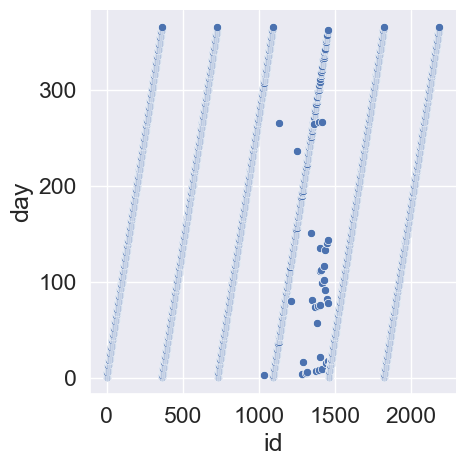

In [345]:
sns.relplot(data=df, x="id",y="day")     #Datos atipicos en la relacion de dia con id
plt.show()

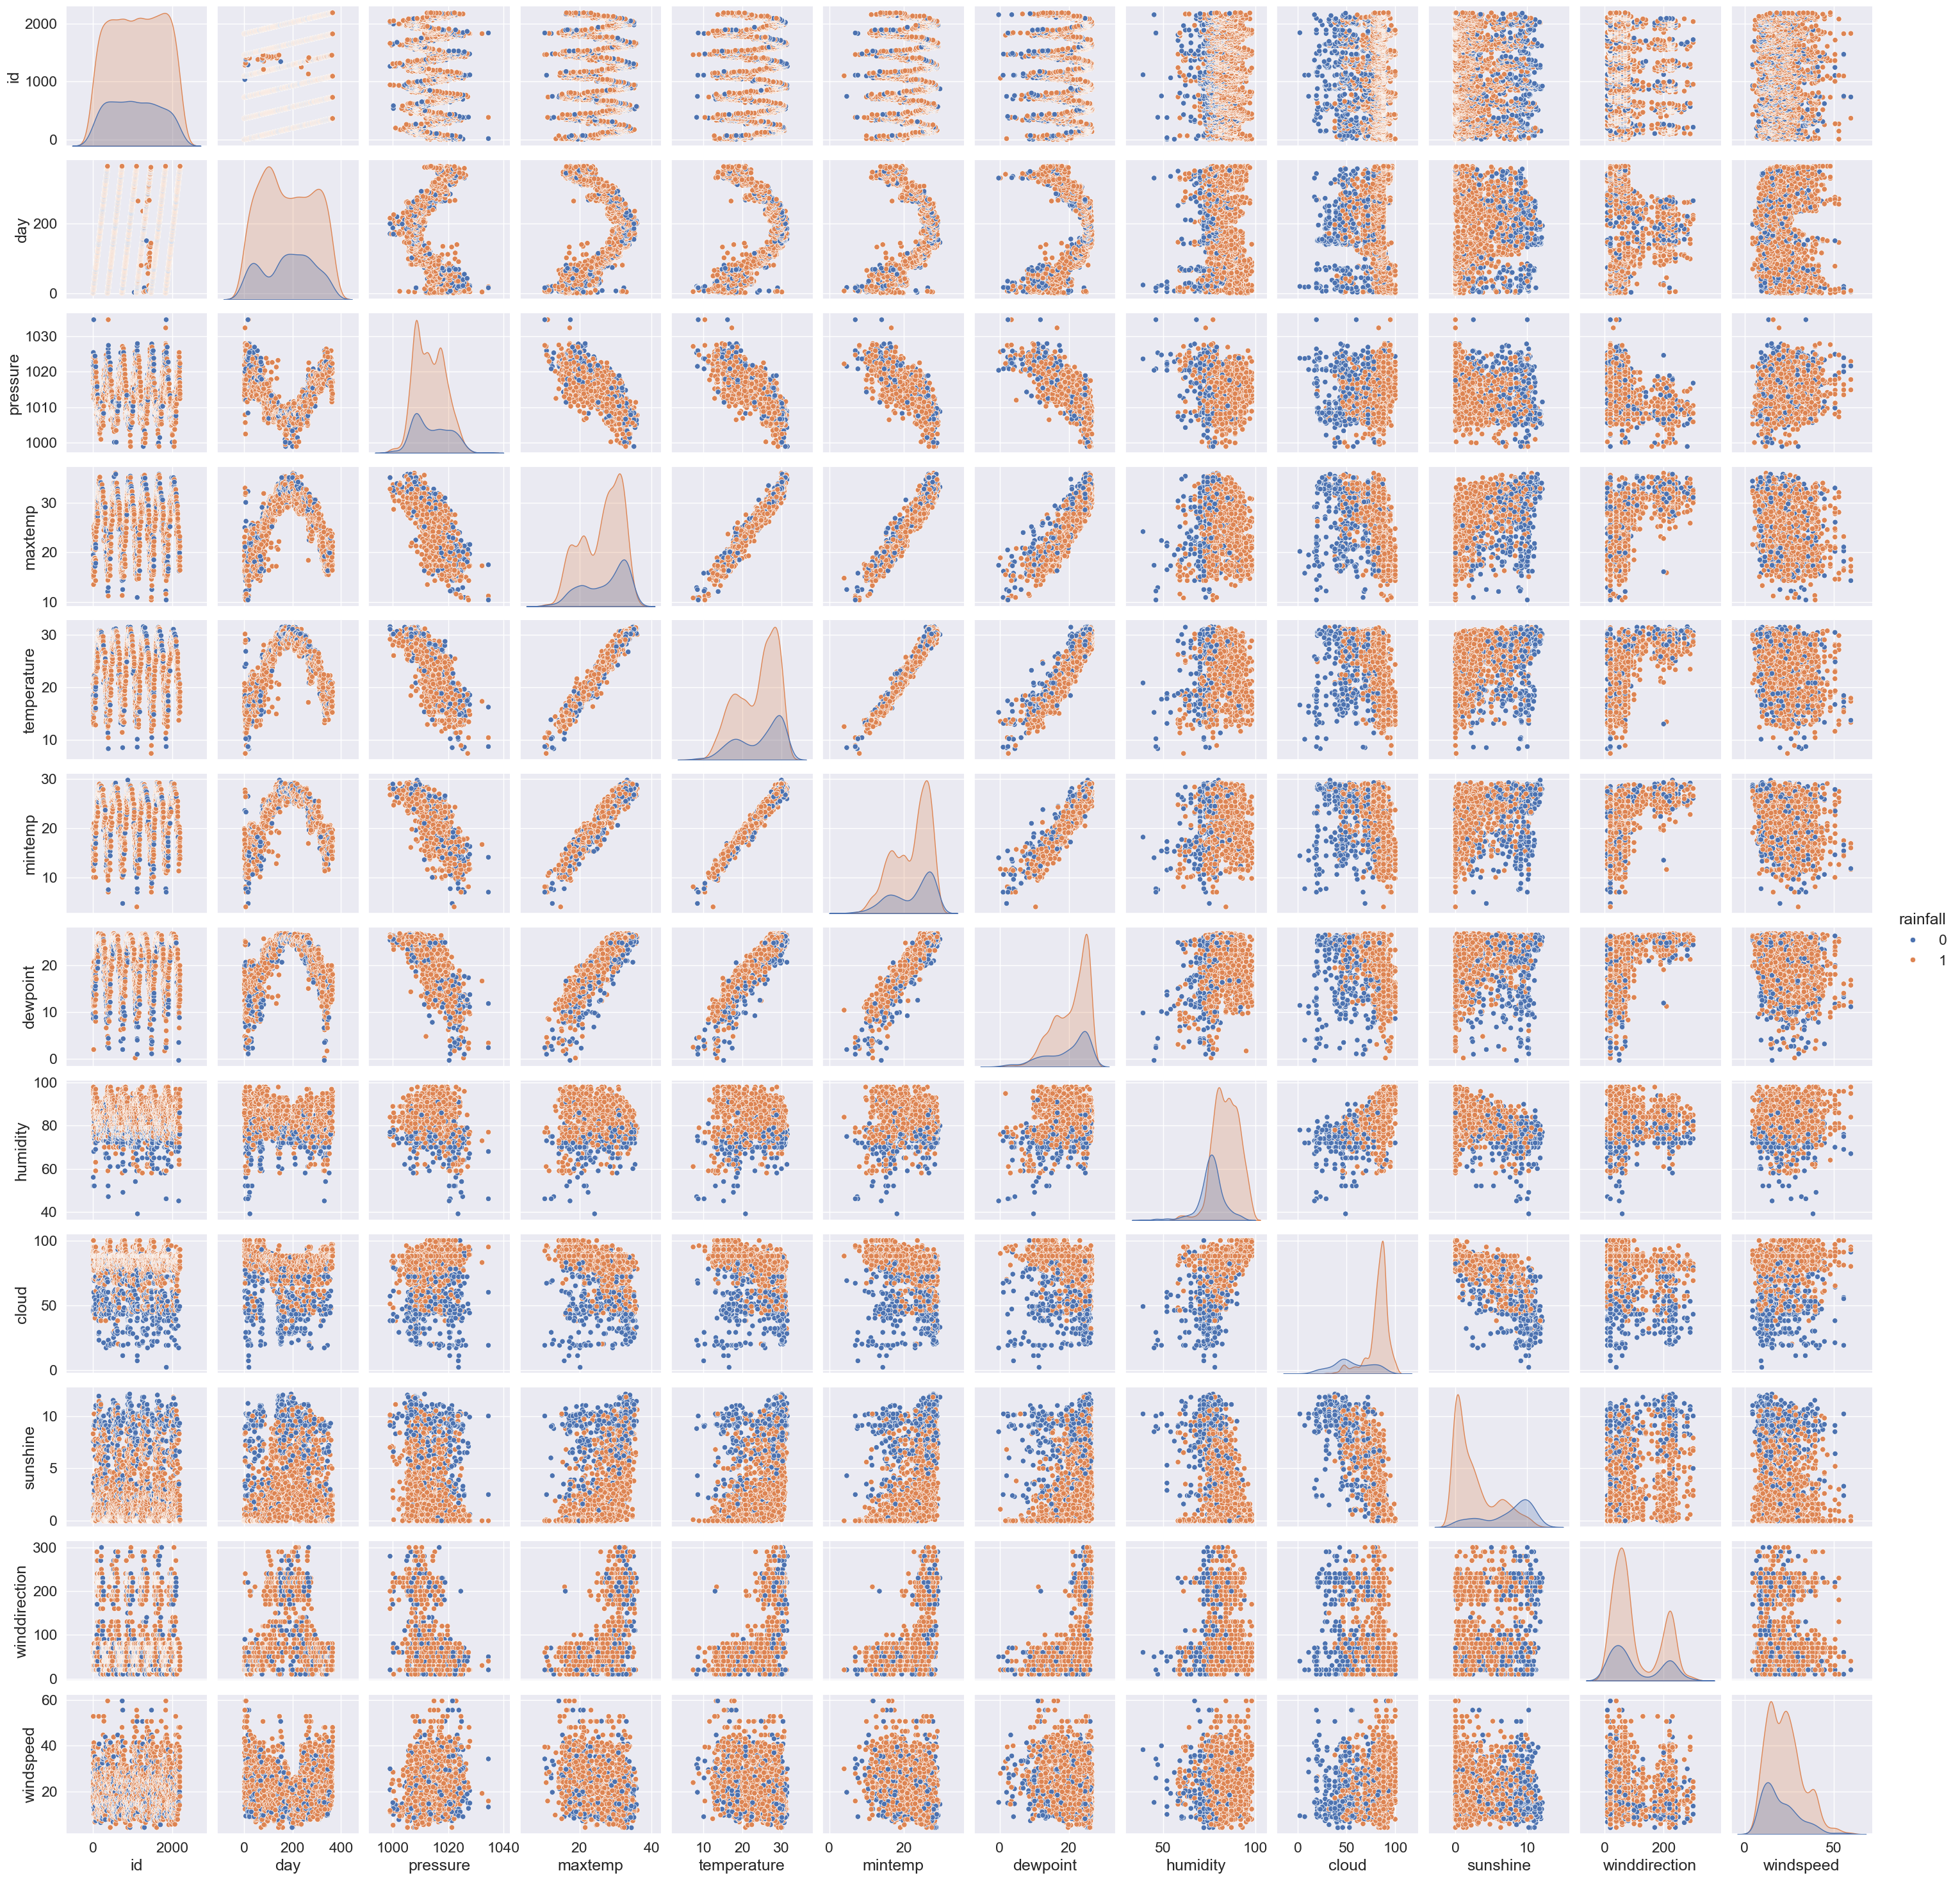

In [347]:
sns.pairplot(df, hue="rainfall")

plt.show()

In [348]:
df.head(1)

id  day  pressure  maxtemp  temperature  mintemp  dewpoint  humidity  \
0   0    1    1017.4     21.2         20.6     19.9      19.4      87.0   

   cloud  sunshine  winddirection  windspeed  rainfall  
0   88.0       1.1           60.0       17.2         1

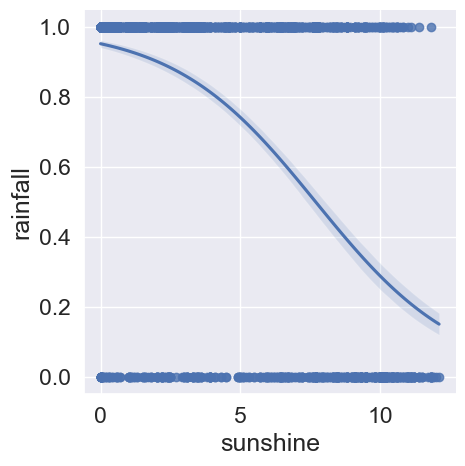

In [349]:
sns.lmplot(data=df,x='sunshine', y='rainfall', logistic=True)
plt.show()

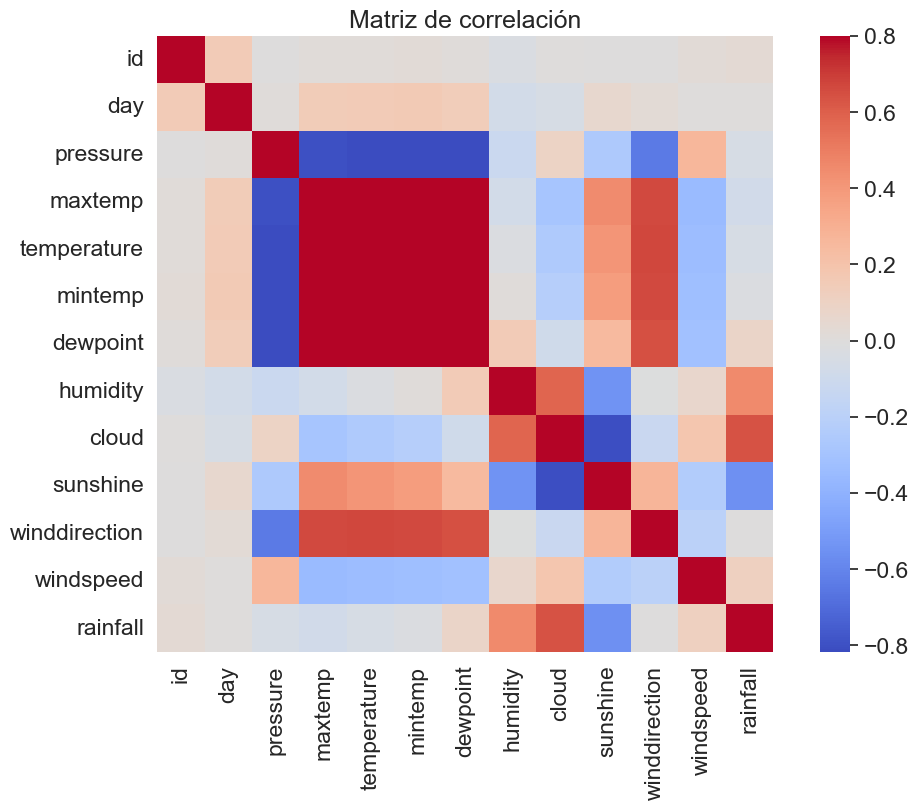

In [350]:

corrmat = df.corr()

plt.figure(figsize=(12, 8))  # Tamaño del gráfico
sns.heatmap(corrmat, vmax=.8, square=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()  # Muestra el gráfico

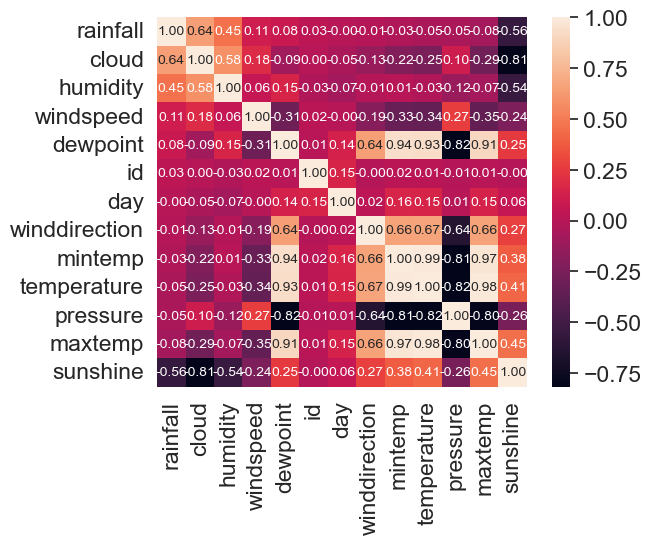

In [351]:

k = 14 #numero de variables
cols = corrmat.nlargest(k, 'rainfall').index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [355]:
#Vamos a descartar las columnas mintemp, maxtemp y temperature ya que solapan informacion con dewpoint

df = df.drop(columns=["id","mintemp","maxtemp","temparature"],axis=1)

KeyError: "['temparature'] not found in axis"

In [357]:
df

id  day  pressure  maxtemp  temperature  mintemp  dewpoint  humidity  \
0        0    1    1017.4     21.2         20.6     19.9      19.4      87.0   
1        1    2    1019.5     16.2         16.9     15.8      15.4      95.0   
2        2    3    1024.1     19.4         16.1     14.6       9.3      75.0   
3        3    4    1013.4     18.1         17.8     16.9      16.8      95.0   
4        4    5    1021.8     21.3         18.4     15.2       9.6      52.0   
...    ...  ...       ...      ...          ...      ...       ...       ...   
2185  2185  361    1014.6     23.2         20.6     19.1      19.9      97.0   
2186  2186  362    1012.4     17.2         17.3     16.3      15.3      91.0   
2187  2187  363    1013.3     19.0         16.3     14.3      12.6      79.0   
2188  2188  364    1022.3     16.4         15.2     13.8      14.7      92.0   
2189  2189  365    1013.8     21.2         19.1     18.0      18.0      89.0   

      cloud  sunshine  winddirection  windspeed  rainfall  
0      88.0       1.1           60.0       17.2         1  
1      91.0       0.0           50.0       21.9         1  
2      47.0       8.3           70.0       18.1         1  
3      95.0       0.0           60.0       35.6         1  
4      45.0       3.6           40.0       24.8         0  
...     ...       ...            ...        ...       ...  
2185   88.0       0.1           40.0       22.1         1  
2186   88.0       0.0           50.0       35.3         1  
2187   79.0       5.0           40.0       32.9         1  
2188   93.0       0.1           40.0       18.0         1  
2189   88.0       1.0           70.0       48.0         1  

[2190 rows x 13 columns]

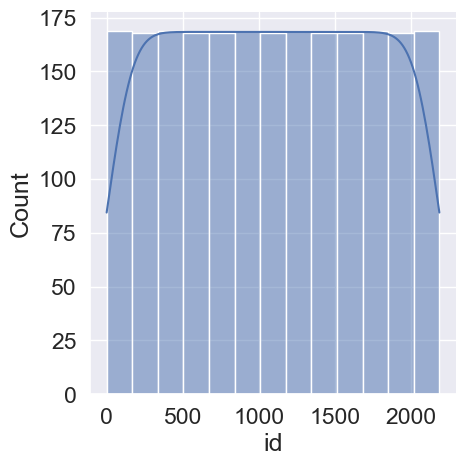

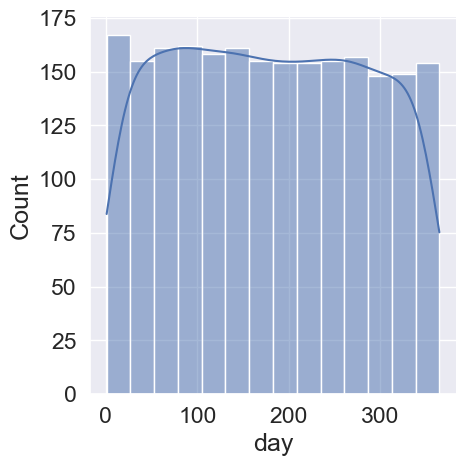

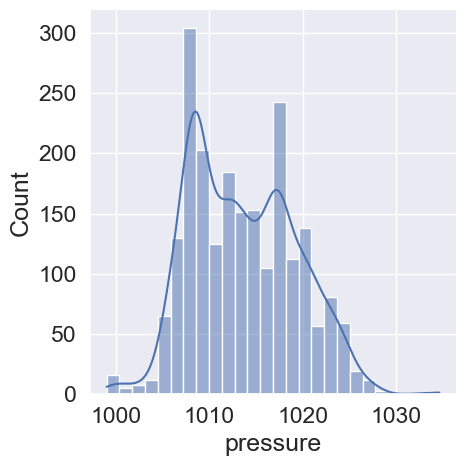

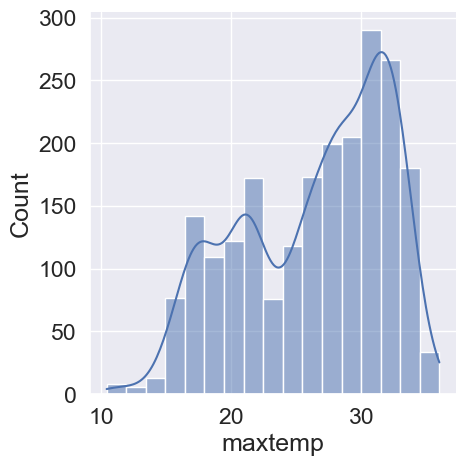

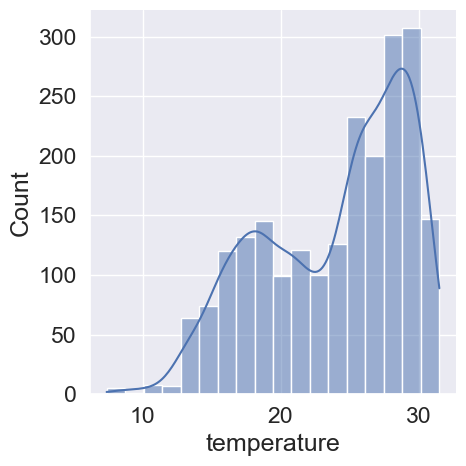

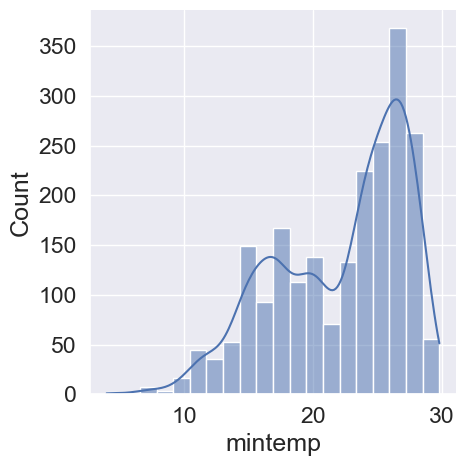

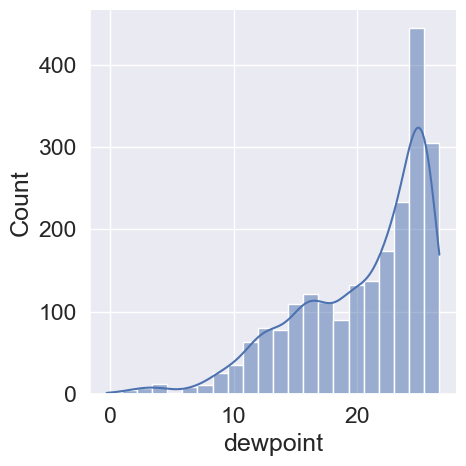

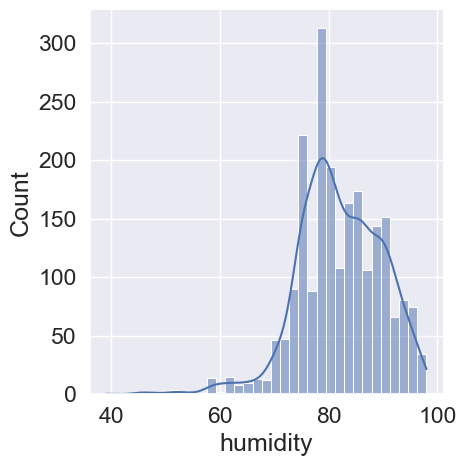

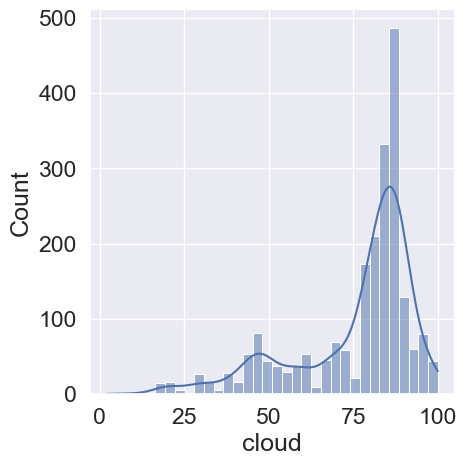

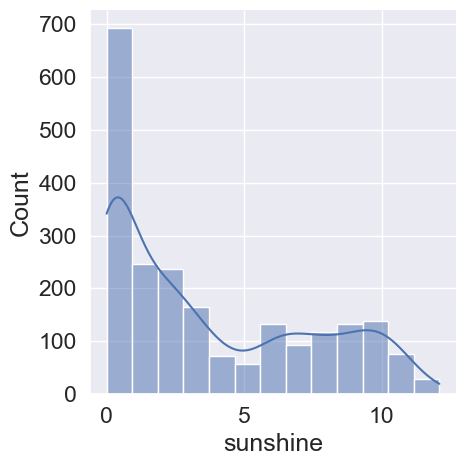

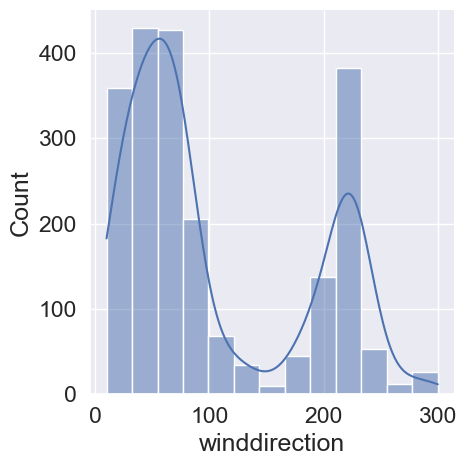

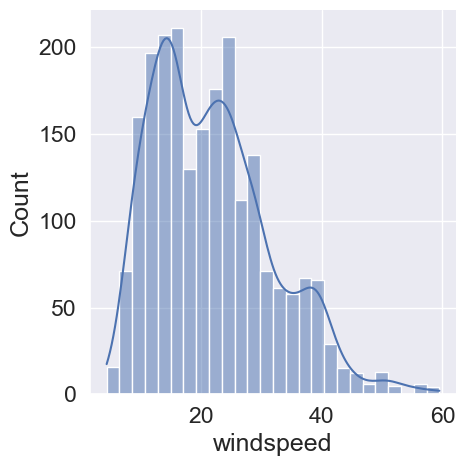

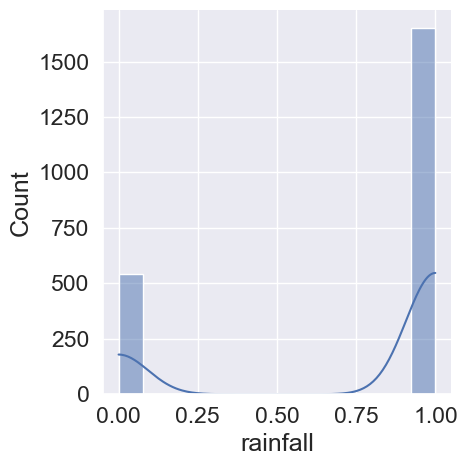

In [359]:
for column in df:
    
    sns.displot(df[column], kind="hist", kde=True)


plt.show()

In [360]:
#quizas transformar  dewpoint, humidity , cloud y sunshine para acercarlos a una normal.

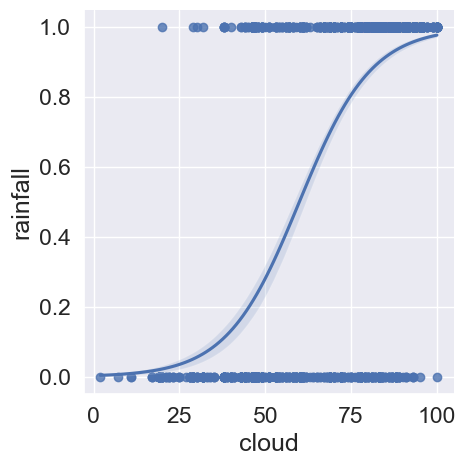

In [361]:
sns.lmplot(data=df,x='cloud', y='rainfall', logistic=True)
plt.show()

In [362]:
df.mean()

id               1094.500000
day               179.948402
pressure         1013.602146
maxtemp            26.365799
temperature        23.953059
mintemp            22.170091
dewpoint           20.454566
humidity           82.036530
cloud              75.721918
sunshine            3.744429
winddirection     104.863151
windspeed          21.804703
rainfall            0.753425
dtype: float64

In [363]:
df.std()

id               632.342866
day              105.203592
pressure           5.655366
maxtemp            5.654330
temperature        5.222410
mintemp            5.059120
dewpoint           5.288406
humidity           7.800654
cloud             18.026498
sunshine           3.626327
winddirection     80.002416
windspeed          9.898659
rainfall           0.431116
dtype: float64

In [364]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['dewpoint_norm'] = scaler.fit_transform(df[['dewpoint']])
df['humidity_norm'] = scaler.fit_transform(df[['humidity']])
df['cloud_norm'] = scaler.fit_transform(df[['cloud']])
df['sunshine_norm'] = scaler.fit_transform(df[['sunshine']])

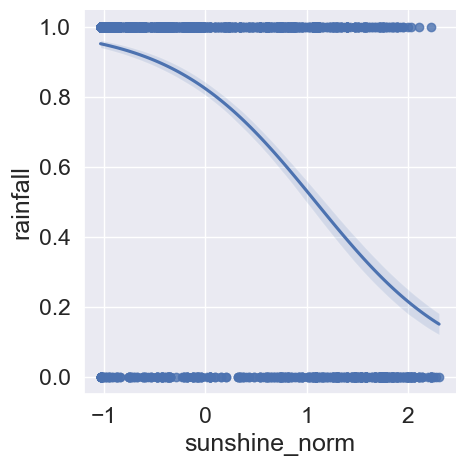

In [367]:
sns.lmplot(data=df,x='sunshine_norm', y='rainfall', logistic=True)
plt.show()

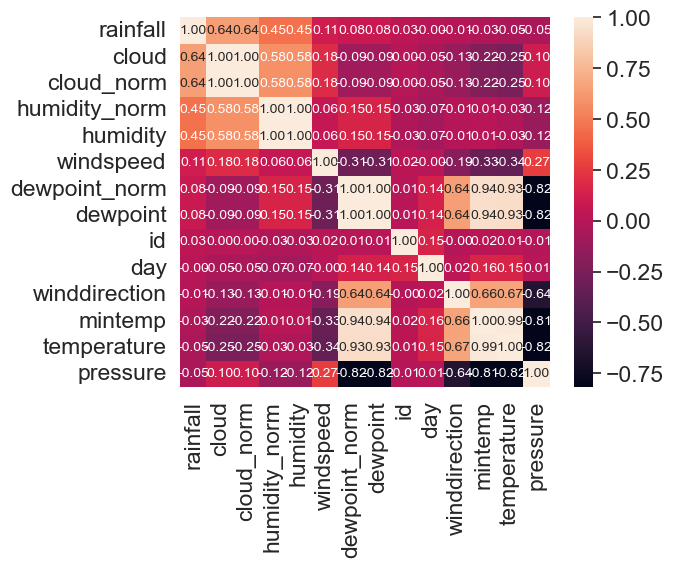

In [369]:
corrmat = df.corr()

k = 20 #numero de variables
cols = corrmat.nlargest(k, 'rainfall').index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
yticklabels=cols.values, xticklabels=cols.values)
plt.show()